Q2. Framing and Windowing (From Scratch)

In [5]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

sampling_rate, signal = wavfile.read("testing_voice.wav")

# Convert stereo to mono if necessary
if len(signal.shape) > 1:
    signal = signal[:, 0]


C:\Users\Apurbo\AppData\Local\Temp\ipykernel_17952\1439257249.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read("testing_voice.wav")


(a) Framing: 25 ms frame size, 10 ms frame shift

In [6]:
# Frame parameters (convert ms → samples)
frame_size = int(0.025 * sampling_rate)   # 25 ms
frame_shift = int(0.010 * sampling_rate)  # 10 ms

signal_length = len(signal)

# Compute total number of frames
num_frames = int(np.floor((signal_length - frame_size) / frame_shift)) + 1

# Create empty matrix for frames
frames = np.zeros((num_frames, frame_size))

# Fill frames
for i in range(num_frames):
    start = i * frame_shift
    end = start + frame_size
    frames[i] = signal[start:end]

print("Frame size (samples):", frame_size)
print("Frame shift (samples):", frame_shift)
print("Total number of frames:", num_frames)


Frame size (samples): 1102
Frame shift (samples): 441
Total number of frames: 2996


(b) Apply Hamming Window

In [7]:
# Create Hamming window manually
n = np.arange(frame_size)
hamming_window = 0.54 - 0.46 * np.cos((2 * np.pi * n) / (frame_size - 1))

# Apply window to all frames
windowed_frames = frames * hamming_window


(c) Plot Two Sample Frames (Before & After Window)

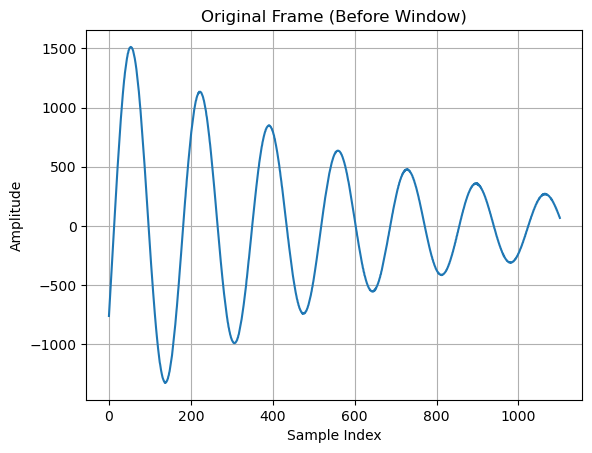

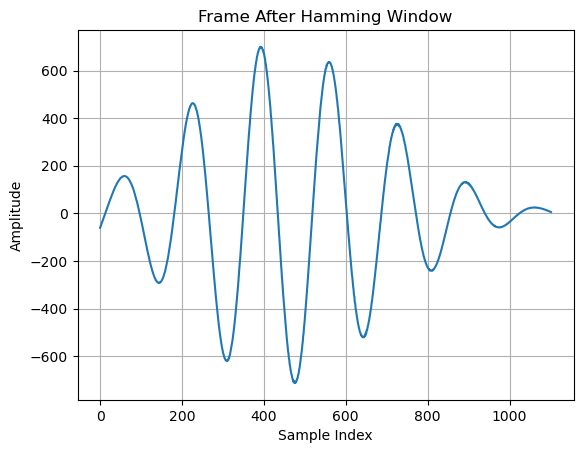

In [8]:
# Select one frame (e.g., 10th frame)
frame_index = 10

plt.figure()
plt.plot(frames[frame_index])
plt.title("Original Frame (Before Window)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

plt.figure()
plt.plot(windowed_frames[frame_index])
plt.title("Frame After Hamming Window")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()
